# Librerias 
Importamos librerías de interés e importamos la información

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Cars93.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [4]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Revisamos las columnas categóricas para analizar cuales son relevantes en el modelo. 

In [5]:
print('Valores únicos por columna categórica: '+ '\n'+'Manufacturer: '+str(df['Manufacturer'].nunique())+'\n'+'Model: '+str(df['Model'].nunique())+'\n'+'Type: '+str(df['Type'].nunique())
         +'\n'+'Airbags: '+str(df['AirBags'].nunique())+'\n'+'DriveTrain: '+str(df['DriveTrain'].nunique())+'\n'+'Cylinders: '+str(df['Cylinders'].nunique())+'\n'+'Man.trans.avail: '+str(df['Man.trans.avail'].nunique())
     +'\n'+'Origin: '+str(df['Origin'].nunique())+'\n'+'Make: '+str(df['Make'].nunique()))

Valores únicos por columna categórica: 
Manufacturer: 32
Model: 93
Type: 6
Airbags: 3
DriveTrain: 3
Cylinders: 6
Man.trans.avail: 2
Origin: 2
Make: 93


Vamos a conservar las variables de cylinders, airbags y origin. 

In [6]:
df = df.drop(columns=['Model','Type','DriveTrain','Man.trans.avail','Make','Manufacturer'])

## Primer análisis 
Vemos que de la información suministrada se encuentran algunos valores nulos, por lo cual procedemos a ver gráficamente qué tanto afectan estos datos al data set

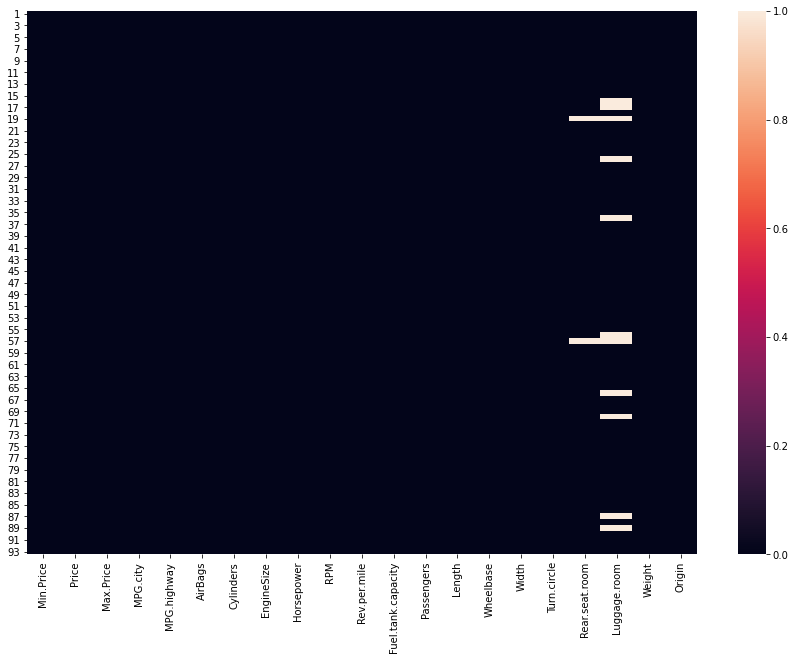

In [7]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

### Remover info tipo nan
Para tratar estos datos, primero sumamos para ver la cantidad de datos que tienen variable NAN

In [8]:
df.isna().sum()

Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

Vemos que solo dos columnas tienen variables nulas. En el caso de la columna Rear.seat.room se pueden eliminar los datos, pues solamente corresponden al $2\%$ de la información. En el caso de la columna Luggage.room la cantidad de datos es importante, siendo casi el $12\%$, por lo tanto reemplazaremos estos valores con un modelo predictivo. Para esto, analizaremos la correlación de esta variable con otras variables y escogeremos 3 variables que mayor correlación tengan con la columna

In [9]:
df = df.dropna(subset=['Rear.seat.room'])
df1 = df.copy().dropna(subset=['Luggage.room'])


In [10]:
df1.corr()['Luggage.room']

Min.Price             0.413485
Price                 0.366569
Max.Price             0.315315
MPG.city             -0.494894
MPG.highway          -0.371629
EngineSize            0.680827
Horsepower            0.359217
RPM                  -0.524845
Rev.per.mile         -0.592792
Fuel.tank.capacity    0.613437
Passengers            0.653317
Length                0.712962
Wheelbase             0.734127
Width                 0.673490
Turn.circle           0.585018
Rear.seat.room        0.651968
Luggage.room          1.000000
Weight                0.637226
Name: Luggage.room, dtype: float64

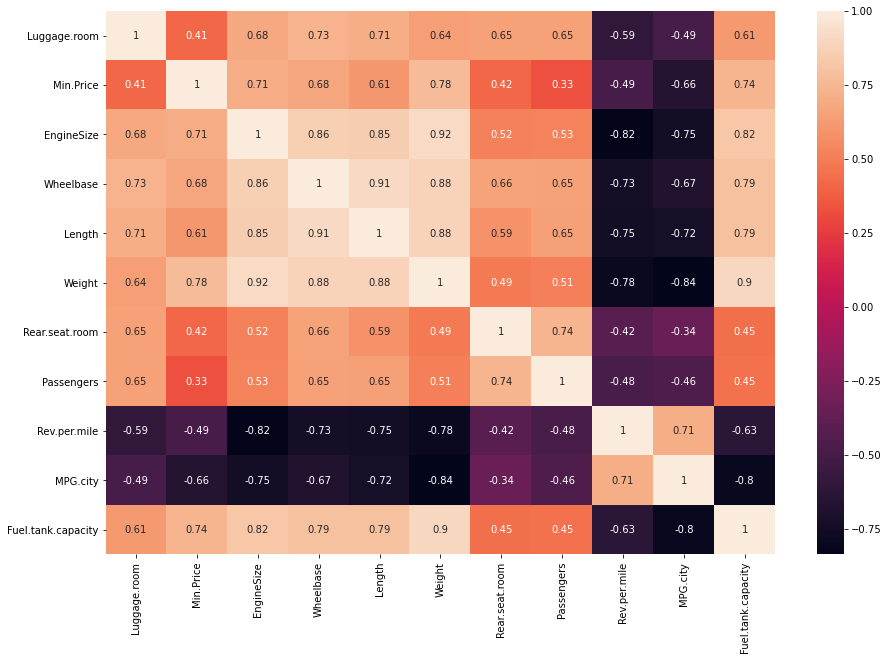

In [11]:
df1 = df1[['Luggage.room','Min.Price','EngineSize','Wheelbase','Length','Weight','Rear.seat.room','Passengers','Rev.per.mile','MPG.city','Fuel.tank.capacity']]
fig = plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True)

# # Filtro de información 
Vemos que de las variables escogidas existen altas correlaciones entre ellas, por lo tanto, se escogeran las variables wheelbase, length, weight y Rear.seat.room

In [12]:
X_l = df1[['Wheelbase','Length','Weight','Rear.seat.room','Min.Price']]
y = df1['Luggage.room']

## Modelo predictivo 
Realizamos un modelo predictivo para arreglar la información. 


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_l, y, test_size=0.33, random_state=42)
paramse = {'normalize':[True,False],'fit_intercept':[True,False]}
gs = GridSearchCV(LinearRegression(),paramse, cv = 3, verbose = 1)
gs_res = gs.fit(X_train,y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


In [14]:
pred = gs_res.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(pred, y_test)), '\n', 'R^2',r2_score(pred,y_test))

RMSE: 2.2594870432887015 
 R^2 0.1882299951240849


Evidentemente este modelo no es lineal gracias al valor de r^2. Por tanto, usaremos el promedio de valores de la columna para llenar los valores nan

In [15]:
df['Luggage.room']=df['Luggage.room'].fillna(int(df1['Luggage.room'].mean()))

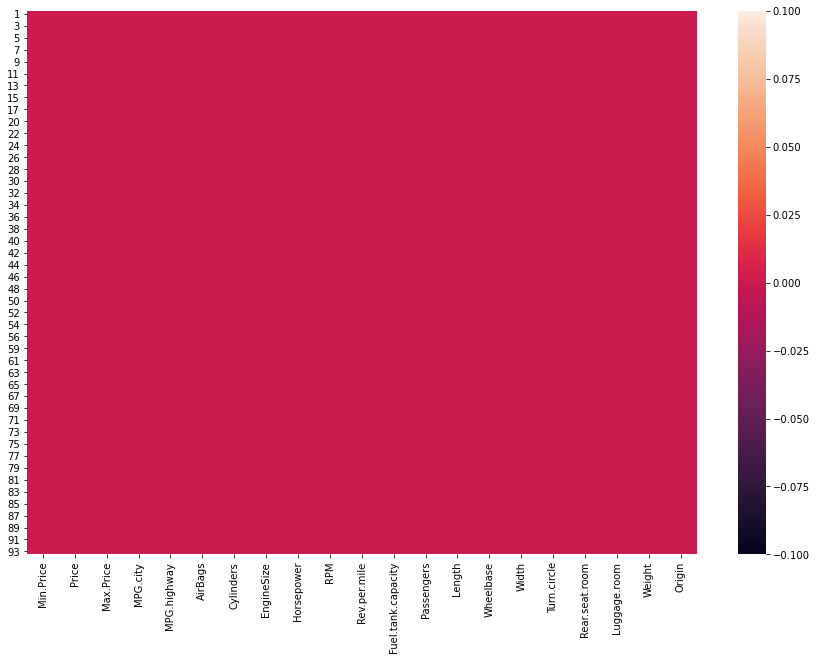

In [16]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

Vemos que claramente pudimos eliminar los valores no deseados de Luggage.room sin quitar una parte importante de la información.  

## Parte 2
En la parte 2 vamos a analizar la variable de interés, es decir, el price. Para esto, usaremos un mapa de calor que nos muestre la correlación de las variables con la variable de interés.

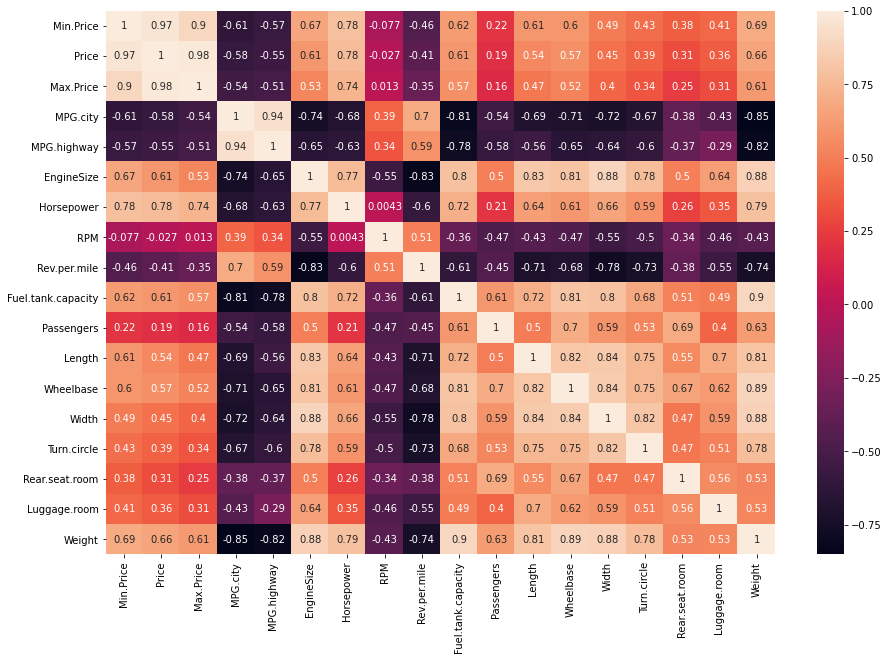

In [17]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Claramente, la única variable que no tiene una correlación importante con Price son las RPM. Por tanto, eliminaremos esta columna. Asimismo, eliminaremos las columnas con una correlación despreciable para simplificar el modelo, estas son: Passengers, Rev.per.mile, Turn.circle, rear.seat.room, luggage.room, y width. De las variables restantes se evaluará qué tan correlacionadas están entre sí 

In [18]:
df = df.drop(columns=['RPM','Passengers','Rev.per.mile','Turn.circle','Rear.seat.room','Luggage.room','Width'])

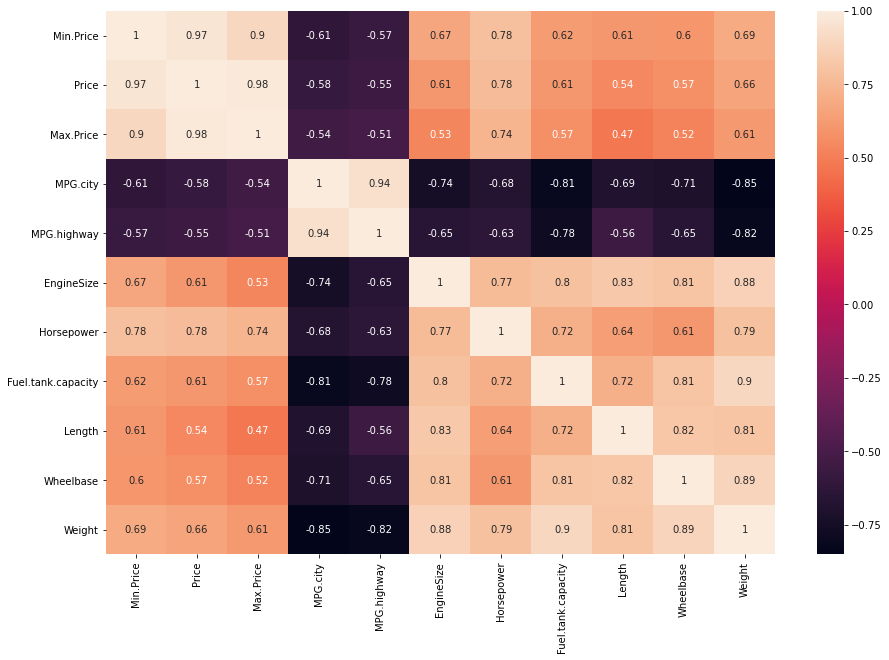

In [19]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

De la tabla anterior vemos que MPG.city y MPG.highway están altamente correlacionadas, por lo cual podemos eliminar la que menos esté relacionada con el precio. Asimismo, min.price y max.price están altamente correlacionadas, por lo cual podemos eliminar la de menor correlación con el precio. Asimimso, MPG.city también se puede eliminar pues está altamente correlacionado con Fuel.tank.capacity, y esta última columna nos da más información sobre el precio. Por otra parte, las columnas length y wheelbase están altamente correlacionadas con Enginesize, por lo cual también las quitaremos. 

In [20]:
df = df.drop(columns=['MPG.city','MPG.highway','Min.Price','Length','Wheelbase'])

<Figure size 1080x720 with 0 Axes>

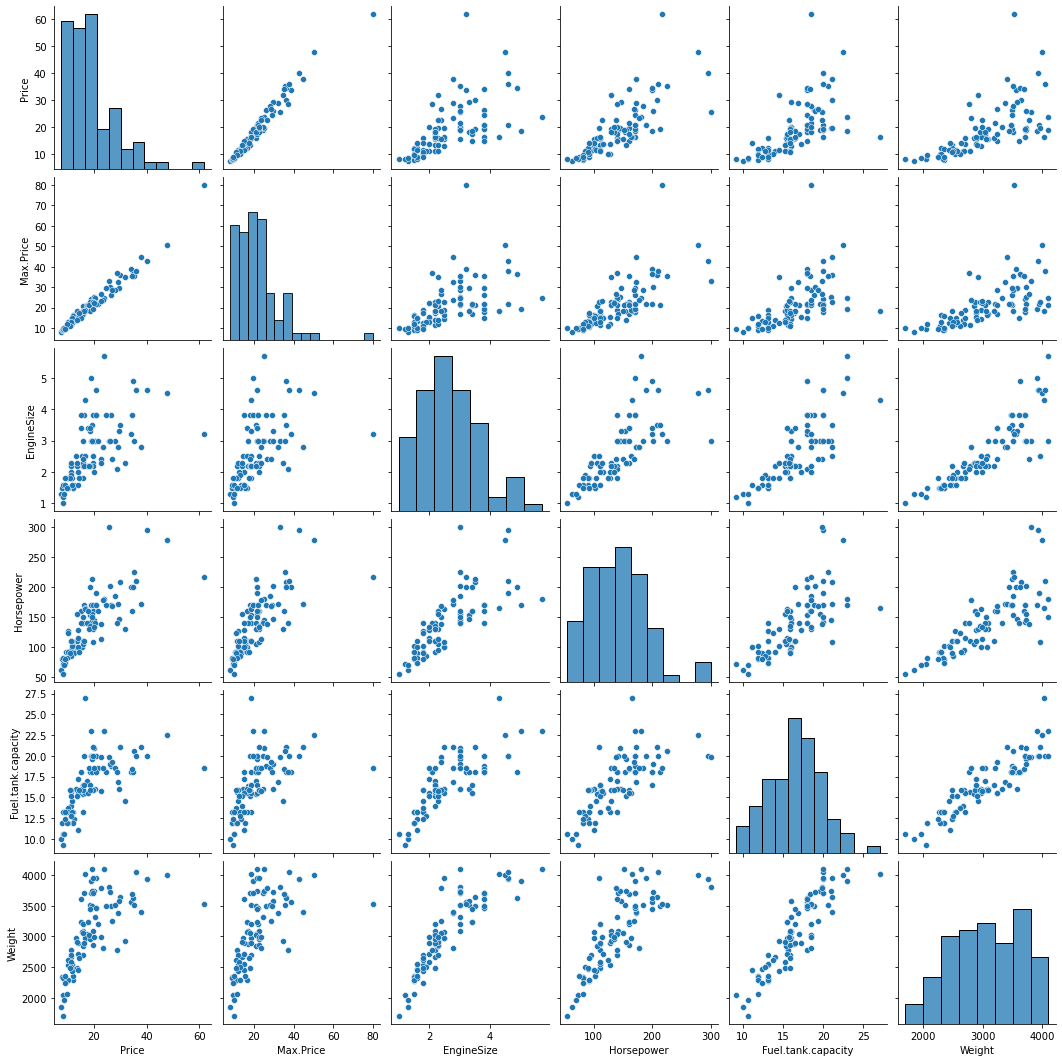

In [21]:
fig = plt.figure(figsize=(15,10))
sns.pairplot(df)

## Parte 3
En esta parte presentamos la hipótesis: el modelo de regresión lineal presenta una mejor aproximación a la predicción del valor de los carros respecto a un modelo clasificatorio. 

Para esto, evaluaremos el modelo lineal con dos parámetros, el error cuadrático medio y el valor de $r^2$. El modelo clasificatorio va a ser un random forest classifier y se va a medir la efectividad del modelo con el parámetro f1-score. Para realizar la clasificación realizamos un análisis únicamente del precio.

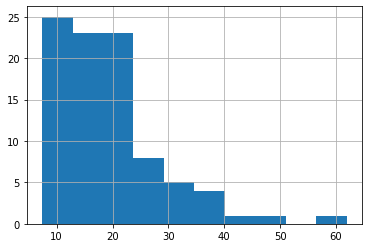

In [57]:
df['Price'].hist()

Vemos que los valores de los automóviles están en un rango entre 0-60, por lo cual la clasificación va a ser la siguiente: precio bajo entre 0-20, precio medio entre 20-40 y precio alto entre 40-60

In [23]:
def clasificacion(x):
    if x<20.0:
        return 1
    elif (x>20.0) & (x<40.0):
        return 2
    else:
        return 3
df['Class price'] = df['Price'].apply(lambda x:clasificacion(x))

Tenemos que volver las columnas categoricas en numéricas para entrenar el modelo.

In [25]:
a = pd.get_dummies(df['AirBags'], drop_first=True)
b = pd.get_dummies(df['Cylinders'], drop_first = True)
c = pd.get_dummies(df['Origin'], drop_first = True)
df = pd.concat([df,a,b,c],axis=1)

In [28]:
X

,Max.Price,EngineSize,Horsepower,Fuel.tank.capacity,Weight,Driver only,None,4,5,6,8,non-USA
1,18.8,1.8,140,13.2,2705,0,1,1,0,0,0,1
2,38.7,3.2,200,18.0,3560,0,0,0,0,1,0,1
3,32.3,2.8,172,16.9,3375,1,0,0,0,1,0,1
4,44.6,2.8,172,21.1,3405,0,0,0,0,1,0,1
5,36.2,3.5,208,21.1,3640,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89,22.7,2.5,109,21.1,3960,0,1,0,1,0,0,1
90,22.4,2.0,134,18.5,2985,0,1,1,0,0,0,1
91,23.7,2.8,178,18.5,2810,0,1,0,0,1,0,1
92,23.5,2.3,114,15.8,2985,1,0,1,0,0,0,1


In [29]:
y_linear = df['Price'].copy()
y_class = df['Class price'].copy()
X = df.copy().drop(columns = ['Price','Class price','AirBags','Cylinders','Origin'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y_linear, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
params = {'normalize':[True,False],'fit_intercept':[True,False]}
gs = GridSearchCV(LinearRegression(), params, cv = 5, n_jobs = 5)
gs.fit(X_train_l, y_train_l)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=5,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

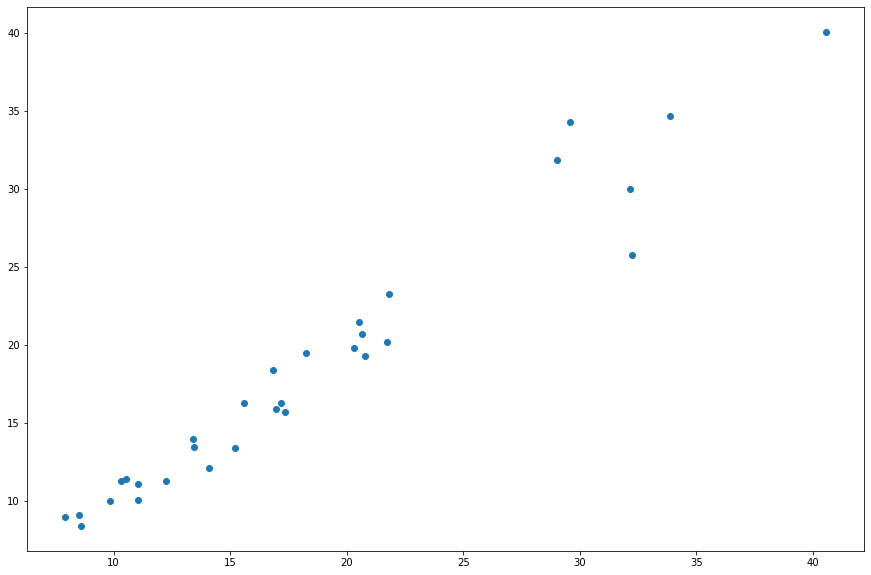

In [33]:
pred_linear = gs.predict(X_test_l)
fig,ax = plt.subplots(figsize=(15,10))
ax.scatter(pred_linear,y_test_l)

In [34]:
print('RMSE:',np.sqrt(mean_squared_error(pred_linear, y_test_l)), '\n', 'R^2',r2_score(pred_linear,y_test_l))

RMSE: 1.8607140614097448 
 R^2 0.9497539183346889


## Evaluación del modelo lineal 
El modelo lineal claramente predice con una alta confiabilidad el valor del precio de los carros. Esto se evidencia en el valor del r^2 pues esto indica que la relación entre las variables escogidas para entrenar el modelo y la variable de precio si es lineal. Asimismo, el error cuadrático medio es bajo en comparación con la magnitud de los valores de precio, esto indica que no hay un error alto al calcular el valor. Podemos evidenciar una correlación lineal en la gráfica anterior.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_class = X.copy().drop(columns=['Driver only','None','4','5','6','8','non-USA'])
scaler.fit(X_class)
scaled_features = scaler.transform(X_class)

In [43]:
df_feat = pd.DataFrame(scaled_features,columns=X_class.columns)


In [54]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( df_feat, y_class, test_size=0.33, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier
params_class = {'n_estimators':[20,50,100,200,1000],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
gs_class = GridSearchCV(RandomForestClassifier(),params_class, cv= 3, n_jobs = 5, verbose = 1)
gs_class = gs_class.fit(X_train_c,y_train_c)
pred_class = gs_class.predict(X_test_c)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred_class,y_test_c), confusion_matrix(pred_class,y_test_c))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done  81 out of  90 | elapsed:   10.8s remaining:    1.1s


              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.89      0.89      0.89         9
           3       0.00      0.00      0.00         0

    accuracy                           0.94        31
   macro avg       0.63      0.61      0.62        31
weighted avg       0.97      0.94      0.95        31
 [[21  1  0]
 [ 0  8  1]
 [ 0  0  0]]


[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   13.5s finished
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluación modelo clasificatorio
El modelo clasificatorio resultó tener problemas al predecir la categoría de precio alto. Esto se debe seguramente a que no hay tanta información en esta categoría y por tanto, al hacer el split, no queda información de precio alto en la información de testeo. Por tanto el modelo tuvo un rendimiento promedio del $62\%$, sin embargo, para predecir las categorías de bajo precio y medio precio tuvo una eficacia del $95\%$, comparable con la eficacia del modelo linal. 

# Conclusiones
Podemos aceptar la hipótesis propuesta, dado que en términos generales el modelo lineal no presentó problemas al intentar predecir valores de precio alto. Sin embargo, el problema al dividir la información surge por la poca cantidad de datos encontrados, lo cual pudo no verse reflejado en el resultado del modelo. Asimismo, el modelo clasificatorio presenta una predicción casi perfecta para los precios bajos y medios, pero por falta de información no fue posible medir la clasificación de precios altos.